In [2]:
# Importing the Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

import time

from sklearn.metrics import r2_score, root_mean_squared_error

pd.set_option('display.float_format', '{:,.2f}'.format)  

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the data
df = pd.read_csv('imdb_movies.csv')

In [4]:
# Top 2
df.head(2)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.00,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,"75,000,000.00","271,616,668.00",AU
1,Avatar: The Way of Water,12/15/2022,78.00,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,"460,000,000.00","2,316,794,914.00",AU


In [5]:
# Rows and columns
df.shape

(10178, 12)

In [4]:
# Removing the unwanted columns
df = df.drop(['names', 'genre', 'overview', 'crew', 'orig_title'], axis = 1)

In [5]:
df.head(2)

,date_x,score,status,orig_lang,budget_x,revenue,country
0,03/02/2023,73.00,Released,English,"75,000,000.00","271,616,668.00",AU
1,12/15/2022,78.00,Released,English,"460,000,000.00","2,316,794,914.00",AU


In [6]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_x     10178 non-null  object 
 1   score      10178 non-null  float64
 2   status     10178 non-null  object 
 3   orig_lang  10178 non-null  object 
 4   budget_x   10178 non-null  float64
 5   revenue    10178 non-null  float64
 6   country    10178 non-null  object 
dtypes: float64(3), object(4)
memory usage: 556.7+ KB


In [7]:
# Converting the date_x column to datetype
df['date_x'] = df['date_x'].astype('datetime64[ns]')

In [8]:
df.head(2)

,date_x,score,status,orig_lang,budget_x,revenue,country
0,2023-03-02,73.00,Released,English,"75,000,000.00","271,616,668.00",AU
1,2022-12-15,78.00,Released,English,"460,000,000.00","2,316,794,914.00",AU


In [9]:
# Adding time related features
df['year'] = df['date_x'].dt.year
df['month'] = df['date_x'].dt.month
df['day'] = df['date_x'].dt.day
df['day of week'] = df['date_x'].dt.dayofweek

In [10]:
# Dropping the date_x
df = df.drop('date_x', axis = 1)
df.head(2)

,score,status,orig_lang,budget_x,revenue,country,year,month,day,day of week
0,73.00,Released,English,"75,000,000.00","271,616,668.00",AU,2023,3,2,3
1,78.00,Released,English,"460,000,000.00","2,316,794,914.00",AU,2022,12,15,3


In [11]:
# Encoding: LabelEncoding
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])
df['orig_lang'] = le.fit_transform(df['orig_lang'])
df['country'] = le.fit_transform(df['country'])
df['year'] = le.fit_transform(df['year'])

In [12]:
df.head(2)

,score,status,orig_lang,budget_x,revenue,country,year,month,day,day of week
0,73.00,2,12,"75,000,000.00","271,616,668.00",2,98,3,2,3
1,78.00,2,12,"460,000,000.00","2,316,794,914.00",2,97,12,15,3


# Model Building

In [13]:
# Splitting X and y
X = df.drop('revenue', axis = 1)
y = df['revenue']

In [14]:
# Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

## Decision Tree`

In [15]:
# Using Decision Tree
dt = DecisionTreeRegressor()

In [16]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [17]:
y_pred = dt.predict(X_test)

In [18]:
r2_score(y_test, y_pred)

0.3848330234944398

In [19]:
root_mean_squared_error(y_test, y_pred)

218089121.3748228

## Random Forest

In [20]:
rf = RandomForestRegressor()

In [21]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
y_pred = rf.predict(X_test)

In [23]:
r2_score(y_test, y_pred)

0.6809534575849596

In [24]:
root_mean_squared_error(y_test, y_pred)

157059610.9279262

### Gradient Boosting

In [25]:
gb = GradientBoostingRegressor()

In [26]:
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [27]:
y_pred = gb.predict(X_test)

In [28]:
r2_score(y_test, y_pred)

0.6690535326992896

In [29]:
root_mean_squared_error(y_test, y_pred)

159961832.5482017

### XGBosst

In [30]:
xgb = XGBRegressor()

In [31]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred = xgb.predict(X_test)

In [33]:
r2_score(y_test, y_pred)

0.6509058190974262

In [34]:
root_mean_squared_error(y_test, y_pred)

164289119.04642728

### Adaboost

In [35]:
ab = AdaBoostRegressor()

In [36]:
ab.fit(X_train, y_train)

AdaBoostRegressor()

In [37]:
y_pred = ab.predict(X_test)

In [38]:
r2_score(y_test, y_pred)

0.25749893005773183

### CatBoost

In [39]:
cb = CatBoostRegressor()

In [40]:
cb.fit(X_train, y_train)

Learning rate set to 0.055835
0:	learn: 269030045.2047969	total: 144ms	remaining: 2m 23s
1:	learn: 261350787.7988251	total: 149ms	remaining: 1m 14s
2:	learn: 254312643.1056010	total: 154ms	remaining: 51.2s
3:	learn: 248212929.2926478	total: 158ms	remaining: 39.4s
4:	learn: 241716280.5613823	total: 164ms	remaining: 32.7s
5:	learn: 235821172.6113596	total: 170ms	remaining: 28.2s
6:	learn: 230270643.3257709	total: 176ms	remaining: 24.9s
7:	learn: 225163657.0652230	total: 181ms	remaining: 22.5s
8:	learn: 220233960.8732565	total: 187ms	remaining: 20.6s
9:	learn: 215591584.3960801	total: 193ms	remaining: 19.1s
10:	learn: 211257670.6106947	total: 199ms	remaining: 17.9s
11:	learn: 207349231.8268957	total: 204ms	remaining: 16.8s
12:	learn: 203807213.8265541	total: 210ms	remaining: 15.9s
13:	learn: 200693551.4324925	total: 215ms	remaining: 15.1s
14:	learn: 197857669.4504182	total: 220ms	remaining: 14.5s
15:	learn: 195001304.9632574	total: 225ms	remaining: 13.9s
16:	learn: 192222778.6666125	total

In [41]:
y_pred = cb.predict(X_test)

In [42]:
r2_score(y_test, y_pred)

0.6782140760440196

In [43]:
root_mean_squared_error(y_test, y_pred)

157732438.47183958

### LightGBM

In [44]:
lg = LGBMRegressor()

In [45]:
lg.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 534
[LightGBM] [Info] Number of data points in the train set: 7124, number of used features: 9
[LightGBM] [Info] Start training from score 253573628.014177


LGBMRegressor()

In [46]:
y_pred = lg.predict(X_test)

In [47]:
r2_score(y_test, y_pred)

0.6714544731416501

In [48]:
root_mean_squared_error(y_test, y_pred)

159380533.19340295

### Linear Regression

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = lr.predict(X_test)

In [52]:
r2_score(y_test, y_pred)

0.5417476773727243

In [53]:
root_mean_squared_error(y_test, y_pred)

188230429.61903512

### Lasso

In [54]:
ls = Lasso()

In [55]:
ls.fit(X_train, y_train)

Lasso()

In [56]:
y_pred = ls.predict(X_test)

In [57]:
r2_score(y_test, y_pred)

0.541747678967883

In [58]:
root_mean_squared_error(y_test, y_pred)

188230429.2914237

### Ridge

In [59]:
rd = Ridge()

In [60]:
rd.fit(X_train, y_train)

Ridge()

In [61]:
y_pred = rd.predict(X_test)

In [62]:
r2_score(y_test, y_pred)

0.541786159538204

### ENET

In [63]:
enet = ElasticNet()

In [64]:
enet.fit(X_train, y_train)

ElasticNet()

In [65]:
y_pred = enet.predict(X_test)

In [66]:
r2_score(y_test, y_pred)

0.5398244184236192

In [67]:
root_mean_squared_error(y_test, y_pred)

188625012.2489599

### Feature Engineering

- Adding column budget_per_score = budget_x / score

In [68]:
df['budget_per_score'] = df['budget_x'] / df['score']
df.head(2)

,score,status,orig_lang,budget_x,revenue,country,year,month,day,day of week,budget_per_score
0,73.00,2,12,"75,000,000.00","271,616,668.00",2,98,3,2,3,"1,027,397.26"
1,78.00,2,12,"460,000,000.00","2,316,794,914.00",2,97,12,15,3,"5,897,435.90"


- score_status_interaction = score * status

In [69]:
df['score_status_interaction'] = df['score'] * df['status']

In [70]:
df.head(2)

,score,status,orig_lang,budget_x,revenue,country,year,month,day,day of week,budget_per_score,score_status_interaction
0,73.00,2,12,"75,000,000.00","271,616,668.00",2,98,3,2,3,"1,027,397.26",146.00
1,78.00,2,12,"460,000,000.00","2,316,794,914.00",2,97,12,15,3,"5,897,435.90",156.00


- Create seasonality features

In [71]:
df['is_summer'] = df['month'].apply(lambda x: 1 if x in [3, 4, 5, 6] else 0)  # March to June
df['is_monsoon'] = df['month'].apply(lambda x: 1 if x in [7, 8, 9] else 0)  # July to September
df['is_winter'] = df['month'].apply(lambda x: 1 if x in [10, 11, 12, 1] else 0)  # October to January
df['is_spring'] = df['month'].apply(lambda x: 1 if x == 2 else 0)

df.head(2)

,score,status,orig_lang,budget_x,revenue,country,year,month,day,day of week,budget_per_score,score_status_interaction,is_summer,is_monsoon,is_winter,is_spring
0,73.00,2,12,"75,000,000.00","271,616,668.00",2,98,3,2,3,"1,027,397.26",146.00,1,0,0,0
1,78.00,2,12,"460,000,000.00","2,316,794,914.00",2,97,12,15,3,"5,897,435.90",156.00,0,0,1,0


- Festive Releases

In [72]:
df['is_diwali_release'] = df.apply(lambda x: 1 if (x['month'] == 10 and x['day'] >= 15) or 
                                              (x['month'] == 11 and x['day'] <= 15) else 0, axis=1)
df['is_republic_release'] = df.apply(lambda x: 1 if (x['month'] == 1 and x['day'] == 26)
                                               else 0, axis=1)
df['is_holi_release'] = df.apply(lambda x: 1 if (x['month'] == 3 and x['day'] >= 18) or 
                                              (x['month'] == 3 and x['day'] <= 28) else 0, axis=1)
df['is_eid-ul-fitr_release'] = df.apply(lambda x: 1 if (x['month'] == 4 and x['day'] >= 9) or 
                                              (x['month'] == 5 and x['day'] <= 14) else 0, axis=1)
df['is_independence_release'] = df.apply(lambda x: 1 if (x['month'] == 8 and x['day'] == 15) 
                                              else 0, axis=1)
df['is_navratri_release'] = df.apply(lambda x: 1 if (x['month'] == 9 and x['day'] >= 25) or 
                                              (x['month'] == 10 and x['day'] <= 10) else 0, axis=1)
df['is_christmas_release'] = df.apply(lambda x: 1 if (x['month'] == 12 and x['day'] >= 22) or 
                                              (x['month'] == 12 and x['day'] <= 26) else 0, axis=1)
df['is_ganesh_release'] = df.apply(lambda x: 1 if (x['month'] == 8 and x['day'] >= 31) or 
                                              (x['month'] == 9 and x['day'] <= 20) else 0, axis=1)


df['normal_days_release'] = df.apply(lambda x: 1 if x[['is_diwali_release', 
                                                       'is_republic_release', 
                                                       'is_holi_release', 
                                                       'is_eid-ul-fitr_release', 
                                                       'is_independence_release', 
                                                       'is_navratri_release', 
                                                       'is_christmas_release',
                                                       'is_ganesh_release']].sum() == 0 else 0, axis=1)

df.head(2)

,score,status,orig_lang,budget_x,revenue,country,year,month,day,day of week,...,is_spring,is_diwali_release,is_republic_release,is_holi_release,is_eid-ul-fitr_release,is_independence_release,is_navratri_release,is_christmas_release,is_ganesh_release,normal_days_release
0,73.00,2,12,"75,000,000.00","271,616,668.00",2,98,3,2,3,...,0,0,0,1,0,0,0,0,0,0
1,78.00,2,12,"460,000,000.00","2,316,794,914.00",2,97,12,15,3,...,0,0,0,0,0,0,0,1,0,0


- Revenue Potential from score

In [73]:
result = []
for val in df['score']:
    if val >= 80:
        result.append(2)
    elif val >= 50:
        result.append(1)
    else:
        result.append(0)

df.head(2)

,score,status,orig_lang,budget_x,revenue,country,year,month,day,day of week,...,is_spring,is_diwali_release,is_republic_release,is_holi_release,is_eid-ul-fitr_release,is_independence_release,is_navratri_release,is_christmas_release,is_ganesh_release,normal_days_release
0,73.00,2,12,"75,000,000.00","271,616,668.00",2,98,3,2,3,...,0,0,0,1,0,0,0,0,0,0
1,78.00,2,12,"460,000,000.00","2,316,794,914.00",2,97,12,15,3,...,0,0,0,0,0,0,0,1,0,0


In [74]:
df['revenue_potential'] = result
df['revenue_potential'].value_counts()

revenue_potential
1    8942
0     805
2     431
Name: count, dtype: int64

-  Revenue-to-Budget Ratio : df['revenue'] / df['budget_x']

In [75]:
df['revenue_to_budget'] = df['revenue'] / df['budget_x']

- Budget Category

In [76]:
result = []
for val in df['budget_x']:
    if val < 50000000:
        result.append(0)
    elif val < 200000000:
        result.append(1)
    else:
        result.append(2)
        
df['budget_category'] = result

df.head(2)

,score,status,orig_lang,budget_x,revenue,country,year,month,day,day of week,...,is_holi_release,is_eid-ul-fitr_release,is_independence_release,is_navratri_release,is_christmas_release,is_ganesh_release,normal_days_release,revenue_potential,revenue_to_budget,budget_category
0,73.00,2,12,"75,000,000.00","271,616,668.00",2,98,3,2,3,...,1,0,0,0,0,0,0,1,3.62,1
1,78.00,2,12,"460,000,000.00","2,316,794,914.00",2,97,12,15,3,...,0,0,0,0,1,0,0,1,5.04,2


-  A movie can be considered successful if it earns more than 2x its budget.

In [77]:
result = []
for val in df['revenue_to_budget']:
    if val <= 1:
        result.append(0)
    elif val <= 5:
        result.append(1)
    elif val <= 20:
        result.append(2)
    elif val <= 50:
        result.append(3)
    else:
        result.append(4)

df['success_category'] = result

In [78]:
df.head(2)

,score,status,orig_lang,budget_x,revenue,country,year,month,day,day of week,...,is_eid-ul-fitr_release,is_independence_release,is_navratri_release,is_christmas_release,is_ganesh_release,normal_days_release,revenue_potential,revenue_to_budget,budget_category,success_category
0,73.00,2,12,"75,000,000.00","271,616,668.00",2,98,3,2,3,...,0,0,0,0,0,0,1,3.62,1,1
1,78.00,2,12,"460,000,000.00","2,316,794,914.00",2,97,12,15,3,...,0,0,0,1,0,0,1,5.04,2,2


- Weekend - Saturday and Sunday

In [79]:
df['is_weekend'] = df['day of week'].apply(lambda x: 1 if x in [5, 6] else 0) 
df.head(2)

,score,status,orig_lang,budget_x,revenue,country,year,month,day,day of week,...,is_independence_release,is_navratri_release,is_christmas_release,is_ganesh_release,normal_days_release,revenue_potential,revenue_to_budget,budget_category,success_category,is_weekend
0,73.00,2,12,"75,000,000.00","271,616,668.00",2,98,3,2,3,...,0,0,0,0,0,1,3.62,1,1,0
1,78.00,2,12,"460,000,000.00","2,316,794,914.00",2,97,12,15,3,...,0,0,1,0,0,1,5.04,2,2,0


### Remove Null Values and Duplicates

In [80]:
df.isnull().sum().sum()

0

In [81]:
df.duplicated().sum()

10

In [82]:
df.drop_duplicates(inplace = True)

In [83]:
df.duplicated().sum()

0

### Adding column genre using count vectoriser

In [84]:
df_1 = pd.read_csv('imdb_movies.csv')
df['genre'] = df_1['genre']

In [85]:
df.head(2)

,score,status,orig_lang,budget_x,revenue,country,year,month,day,day of week,...,is_navratri_release,is_christmas_release,is_ganesh_release,normal_days_release,revenue_potential,revenue_to_budget,budget_category,success_category,is_weekend,genre
0,73.00,2,12,"75,000,000.00","271,616,668.00",2,98,3,2,3,...,0,0,0,0,1,3.62,1,1,0,"Drama, Action"
1,78.00,2,12,"460,000,000.00","2,316,794,914.00",2,97,12,15,3,...,0,1,0,0,1,5.04,2,2,0,"Science Fiction, Adventure, Action"


### Again Checking the null values and duplicates

In [86]:
df.dropna(inplace = True)

In [87]:
df.drop_duplicates(inplace = True)

In [88]:
cv = CountVectorizer()
cv.fit(df['genre'])
genre_unique = cv.get_feature_names_out()
count = cv.fit_transform(df['genre']).toarray()
len(genre_unique)

21

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10087 entries, 0 to 10177
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   score                     10087 non-null  float64
 1   status                    10087 non-null  int32  
 2   orig_lang                 10087 non-null  int32  
 3   budget_x                  10087 non-null  float64
 4   revenue                   10087 non-null  float64
 5   country                   10087 non-null  int32  
 6   year                      10087 non-null  int64  
 7   month                     10087 non-null  int32  
 8   day                       10087 non-null  int32  
 9   day of week               10087 non-null  int32  
 10  budget_per_score          10087 non-null  float64
 11  score_status_interaction  10087 non-null  float64
 12  is_summer                 10087 non-null  int64  
 13  is_monsoon                10087 non-null  int64  
 14  is_winter  

In [90]:
df_unique_genre = pd.DataFrame(data = count, columns = genre_unique)
df_unique_genre.head(2)

,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [92]:
df.reset_index(drop = True, inplace = True)
df_unique_genre.reset_index(drop = True, inplace = True)

In [94]:
### Concating with the data frame
df = pd.concat([df.drop('genre', axis = 1), df_unique_genre], axis = 1)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10087 entries, 0 to 10086
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   score                     10087 non-null  float64
 1   status                    10087 non-null  int32  
 2   orig_lang                 10087 non-null  int32  
 3   budget_x                  10087 non-null  float64
 4   revenue                   10087 non-null  float64
 5   country                   10087 non-null  int32  
 6   year                      10087 non-null  int64  
 7   month                     10087 non-null  int32  
 8   day                       10087 non-null  int32  
 9   day of week               10087 non-null  int32  
 10  budget_per_score          10087 non-null  float64
 11  score_status_interaction  10087 non-null  float64
 12  is_summer                 10087 non-null  int64  
 13  is_monsoon                10087 non-null  int64  
 14  is_win

### Now moving some column in front

In [98]:
cols_to_move = ['score', 'budget_x', 'revenue', 'revenue_to_budget', 'score_status_interaction', 'budget_per_score']
df = df[cols_to_move + [col for col in df.columns if col not in cols_to_move]] 

In [99]:
df.head(2)

,score,budget_x,revenue,revenue_to_budget,score_status_interaction,budget_per_score,status,orig_lang,country,year,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,73.00,"75,000,000.00","271,616,668.00",3.62,146.00,"1,027,397.26",2,12,2,98,...,0,0,0,0,0,0,0,0,0,0
1,78.00,"460,000,000.00","2,316,794,914.00",5.04,156.00,"5,897,435.90",2,12,2,97,...,0,0,0,0,0,1,0,0,0,0


### Outlier Detection and Replacing the values

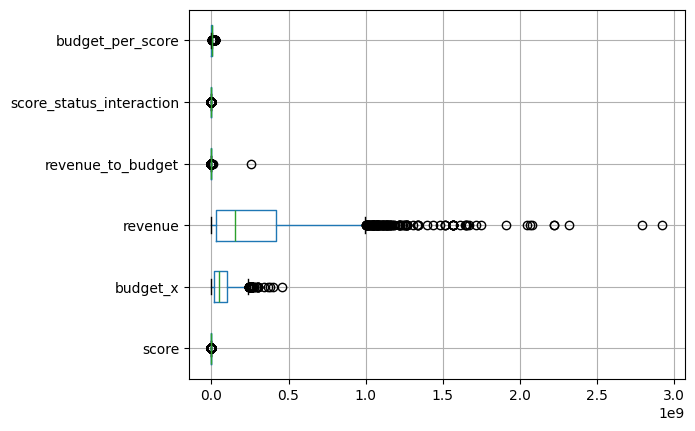

In [102]:
df.iloc[:, : 6].boxplot(vert = False)
plt.show()

In [101]:
def replacing_outliers(df, col):
    df_col = df[col]
    print(f'Boxplot with outliers')
    plt.boxplot(df_col, vert = False)
    plt.title(f'Boxplot With Outliers')
    plt.show()
    
    # Quartiles
    Q1 = np.percentile(df_col, 25, interpolation = 'midpoint')
    Q3 = np.percentile(df_col, 75, interpolation = 'midpoint')

    IQR = Q3 - Q1
    UW = Q3 + IQR * 1.4
    LW = Q1 - IQR * 1.5

    # Outliers Detection
    outliers = df.loc[(df_col >= UW) | (df_col <= LW)]
    print()

    # Print the outliers
    print(f'No of outliers: {len(outliers)}')
    print()
    display(outliers)
    print()

    # Replace the values above the upperbound with upperbound
    df.loc[df_col >= UW, col] = UW

    # Replace the values lower the lowerbound with lowerbound
    df.loc[df_col <= LW, col] = LW

    print(f'Boxplot without outliers')
    plt.boxplot(df_col, vert = False)
    plt.title(f'Boxplot Without Outliers')
    plt.show()

-------------score--------------

Boxplot with outliers


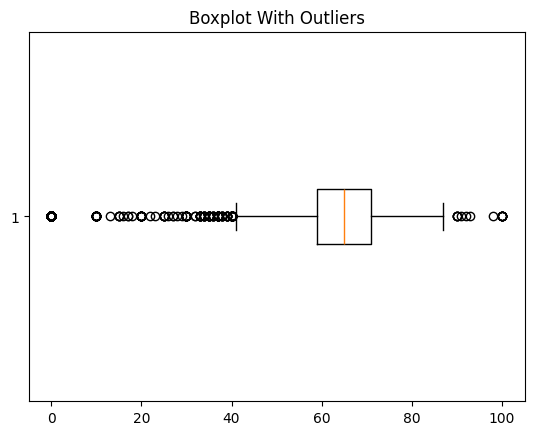


No of outliers: 381



,score,budget_x,revenue,revenue_to_budget,score_status_interaction,budget_per_score,status,orig_lang,country,year,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
117,0.00,"340,000,000.00",0.00,0.00,0.00,inf,1,12,55,98,...,0,0,0,0,0,0,1,0,0,0
216,0.00,"205,000,000.00","178,359,863.00",0.87,0.00,inf,1,12,55,98,...,0,0,0,0,1,0,0,0,0,0
229,0.00,"200,000,000.00","1,240,261.60",0.01,0.00,inf,1,12,55,98,...,0,0,0,0,0,1,0,0,0,0
231,0.00,"264,940,000.00","175,269,998.80",0.66,0.00,inf,1,12,55,98,...,0,0,0,0,0,1,0,0,0,0
269,30.00,"15,541,000.00","38,139,010.00",2.45,60.00,"518,033.33",2,45,16,97,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,0.00,"131,600,000.00","178,359,863.00",1.36,0.00,inf,2,25,31,98,...,0,0,0,0,0,0,0,0,0,0
9895,39.00,"102,800,000.00","814,383,781.60",7.92,78.00,"2,635,897.44",2,12,55,90,...,0,0,0,0,0,1,0,0,0,0
9956,100.00,"201,000,000.00","1,569,323,843.80",7.81,200.00,"2,010,000.00",2,12,55,98,...,0,0,0,0,0,1,1,0,0,0
9996,0.00,1.00,1.00,1.00,0.00,inf,2,12,2,98,...,0,0,0,0,0,0,1,0,0,0



Boxplot without outliers


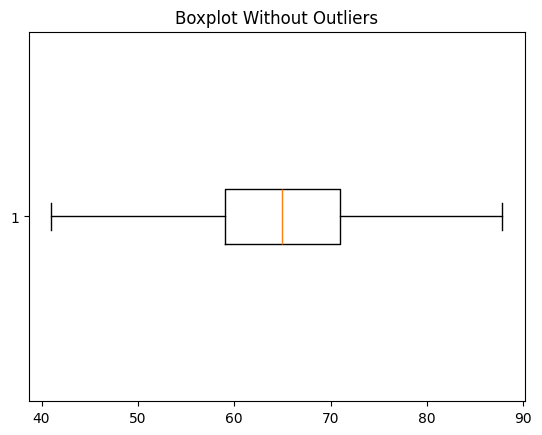

-------------budget_x--------------

Boxplot with outliers


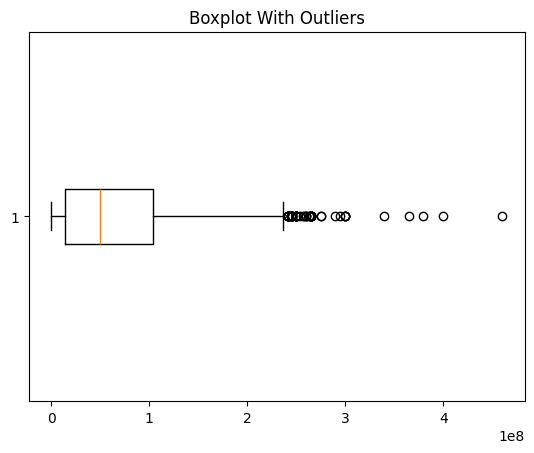


No of outliers: 76



,score,budget_x,revenue,revenue_to_budget,score_status_interaction,budget_per_score,status,orig_lang,country,year,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
1,78.00,"460,000,000.00","2,316,794,914.00",5.04,156.00,"5,897,435.90",2,12,2,97,...,0,0,0,0,0,1,0,0,0,0
13,73.00,"250,000,000.00","854,041,058.00",3.42,146.00,"3,424,657.53",2,12,2,97,...,0,0,0,0,0,1,0,0,0,0
68,76.00,"237,000,000.00","2,923,706,026.00",12.34,152.00,"3,118,421.05",2,12,2,84,...,0,0,0,0,0,1,0,0,0,0
72,66.00,"250,000,000.00","760,928,081.00",3.04,132.00,"3,787,878.79",2,12,2,97,...,0,0,0,0,0,0,0,0,0,0
104,83.00,"300,000,000.00","2,048,359,754.00",6.83,166.00,"3,614,457.83",2,12,2,93,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9037,41.00,"244,940,000.00","175,269,998.80",0.72,0.00,inf,1,12,55,98,...,1,0,0,0,0,0,1,0,0,0
9147,41.00,"264,940,000.00","178,359,863.00",0.67,0.00,inf,2,41,46,98,...,0,0,0,0,1,0,0,0,0,0
9219,41.00,"241,940,000.00","175,269,998.80",0.72,0.00,inf,2,12,55,91,...,0,0,0,0,0,0,0,0,0,0
9496,87.80,"264,000,000.00","1,263,824,107.40",4.79,180.00,"2,933,333.33",2,14,18,98,...,0,1,0,0,0,0,0,1,0,0



Boxplot without outliers


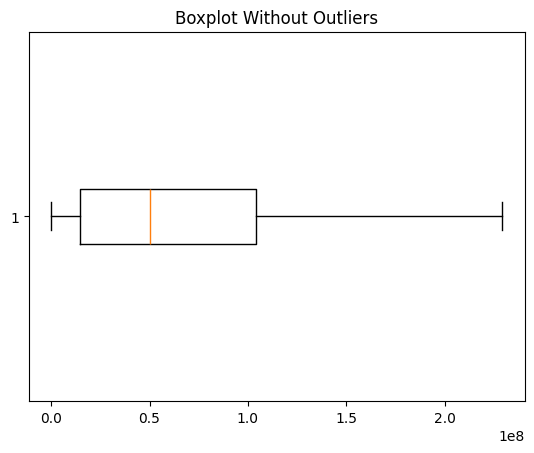

-------------revenue--------------

Boxplot with outliers


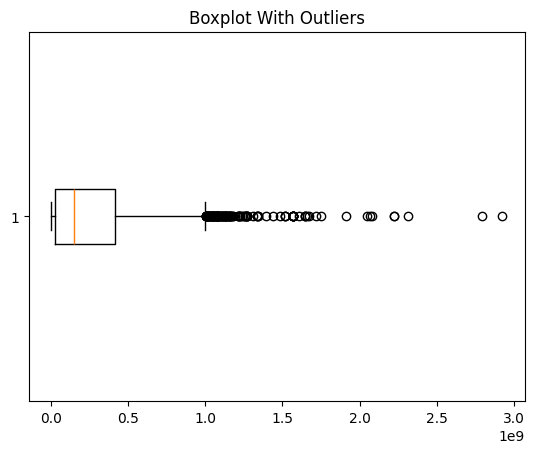


No of outliers: 160



,score,budget_x,revenue,revenue_to_budget,score_status_interaction,budget_per_score,status,orig_lang,country,year,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
1,78.00,"229,190,971.22","2,316,794,914.00",5.04,156.00,"5,897,435.90",2,12,2,97,...,0,0,0,0,0,1,0,0,0,0
56,68.00,"121,400,000.00","977,795,653.40",8.05,136.00,"1,785,294.12",2,35,2,97,...,0,0,0,0,0,0,1,0,0,0
62,83.00,"170,000,000.00","1,481,369,482.00",8.71,166.00,"2,048,192.77",2,12,2,97,...,0,0,0,0,0,0,0,0,0,0
68,76.00,"229,190,971.22","2,923,706,026.00",12.34,152.00,"3,118,421.05",2,12,2,84,...,0,0,0,0,0,1,0,0,0,0
76,80.00,"200,000,000.00","1,910,048,245.00",9.55,160.00,"2,500,000.00",2,12,2,96,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9683,78.00,"108,000,000.00","973,912,359.00",9.02,156.00,"1,384,615.38",2,27,33,95,...,0,0,0,0,1,0,0,0,0,0
9809,49.00,"93,000,000.00","1,256,345,435.20",13.51,98.00,"1,897,959.18",2,25,31,61,...,1,0,0,0,0,0,0,0,0,0
9826,49.00,"147,200,000.00","1,052,163,302.40",7.15,98.00,"3,004,081.63",2,12,55,95,...,0,0,0,0,0,0,1,0,0,0
9881,86.00,"221,000,000.00","1,104,642,091.00",5.00,172.00,"2,569,767.44",2,12,55,95,...,0,0,1,0,0,0,0,0,0,0



Boxplot without outliers


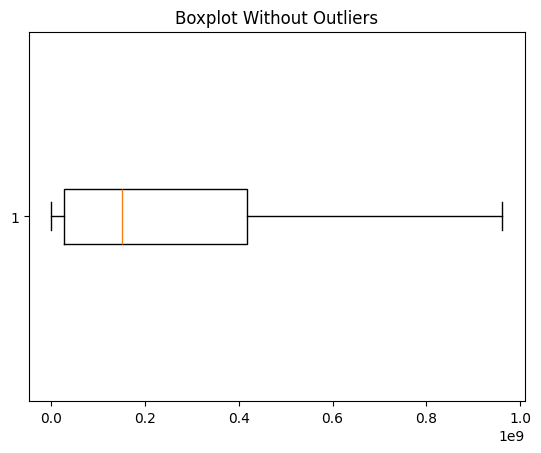

-------------revenue_to_budget--------------

Boxplot with outliers


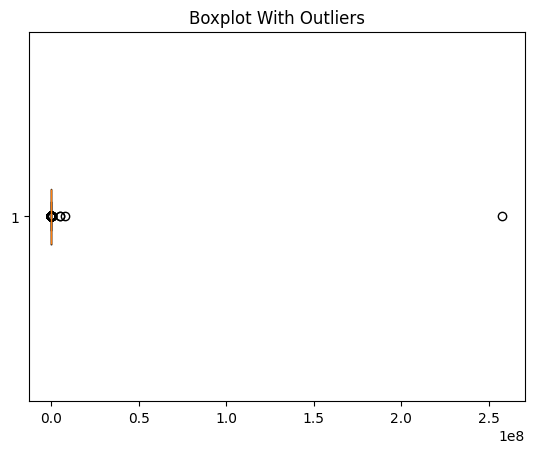


No of outliers: 750



,score,budget_x,revenue,revenue_to_budget,score_status_interaction,budget_per_score,status,orig_lang,country,year,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
10,58.00,"100,000.00","3,200,000.00",32.00,116.00,"1,724.14",2,12,2,98,...,1,0,0,0,0,0,1,0,0,0
11,55.00,"12,000,000.00","428,214,478.00",35.68,110.00,"218,181.82",2,45,36,97,...,1,0,0,0,0,0,0,0,0,0
22,74.00,"25,000,000.00","622,313,635.00",24.89,148.00,"337,837.84",2,12,2,79,...,0,0,0,0,0,0,0,0,0,0
26,53.00,"10,000.00","17,887,093.80","1,788.71",106.00,188.68,2,12,55,97,...,1,0,0,0,0,1,1,0,0,0
29,74.00,"12,000,000.00","167,643,991.00",13.97,148.00,"162,162.16",2,12,2,98,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,65.00,"2,125,000.00","65,000,000.00",30.59,130.00,"32,692.31",2,12,2,22,...,0,0,0,0,0,0,0,0,0,0
10004,71.00,"8,000,000.00","108,423,749.00",13.55,142.00,"112,676.06",2,12,55,58,...,0,0,0,0,0,0,0,0,0,0
10042,53.00,"73,000.00","8,000,000.00",109.59,106.00,"1,377.36",2,12,55,43,...,0,0,0,0,0,0,0,0,0,0
10056,73.00,"1,500,000.00","21,889,329.60",14.59,146.00,"20,547.95",2,12,7,90,...,0,0,0,0,0,0,0,0,0,0



Boxplot without outliers


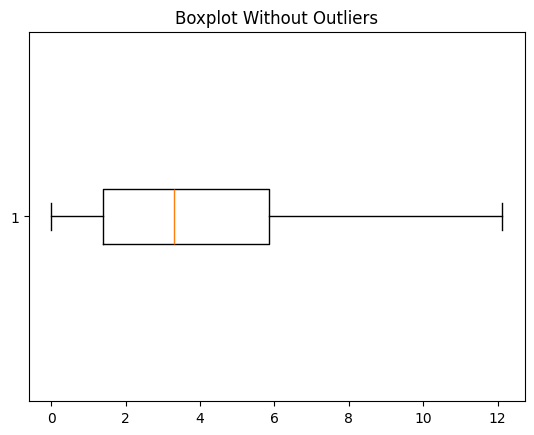

-------------score_status_interaction--------------

Boxplot with outliers


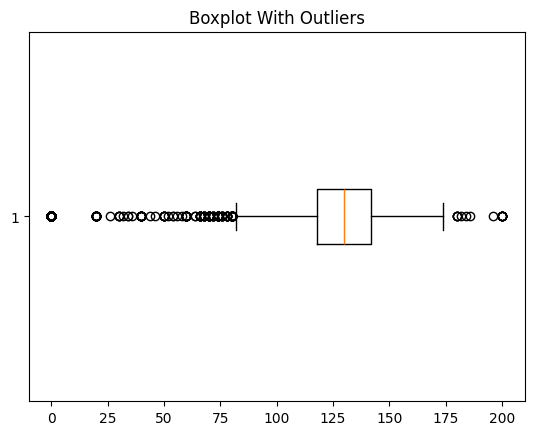


No of outliers: 381



,score,budget_x,revenue,revenue_to_budget,score_status_interaction,budget_per_score,status,orig_lang,country,year,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
117,41.00,"229,190,971.22",0.00,0.00,0.00,inf,1,12,55,98,...,0,0,0,0,0,0,1,0,0,0
216,41.00,"205,000,000.00","178,359,863.00",0.87,0.00,inf,1,12,55,98,...,0,0,0,0,1,0,0,0,0,0
229,41.00,"200,000,000.00","1,240,261.60",0.01,0.00,inf,1,12,55,98,...,0,0,0,0,0,1,0,0,0,0
231,41.00,"229,190,971.22","175,269,998.80",0.66,0.00,inf,1,12,55,98,...,0,0,0,0,0,1,0,0,0,0
269,41.00,"15,541,000.00","38,139,010.00",2.45,60.00,"518,033.33",2,45,16,97,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,41.00,"131,600,000.00","178,359,863.00",1.36,0.00,inf,2,25,31,98,...,0,0,0,0,0,0,0,0,0,0
9895,41.00,"102,800,000.00","814,383,781.60",7.92,78.00,"2,635,897.44",2,12,55,90,...,0,0,0,0,0,1,0,0,0,0
9956,87.80,"201,000,000.00","961,525,211.86",7.81,200.00,"2,010,000.00",2,12,55,98,...,0,0,0,0,0,1,1,0,0,0
9996,41.00,1.00,1.00,1.00,0.00,inf,2,12,2,98,...,0,0,0,0,0,0,1,0,0,0



Boxplot without outliers


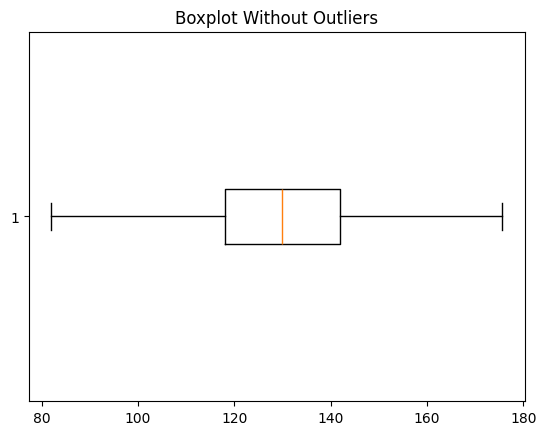

-------------budget_per_score--------------

Boxplot with outliers


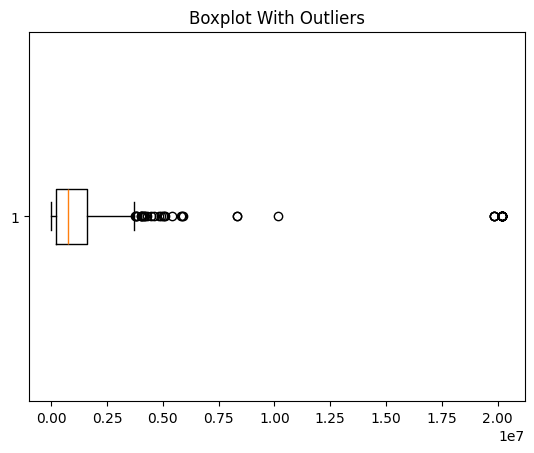


No of outliers: 231



,score,budget_x,revenue,revenue_to_budget,score_status_interaction,budget_per_score,status,orig_lang,country,year,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
1,78.00,"229,190,971.22","961,525,211.86",5.04,156.00,"5,897,435.90",2,12,2,97,...,0,0,0,0,0,1,0,0,0,0
72,66.00,"229,190,971.22","760,928,081.00",3.04,132.00,"3,787,878.79",2,12,2,97,...,0,0,0,0,0,0,0,0,0,0
104,83.00,"229,190,971.22","961,525,211.86",6.83,166.00,"3,614,457.83",2,12,2,93,...,0,0,0,0,0,1,0,0,0,0
117,41.00,"229,190,971.22",0.00,0.00,82.00,inf,1,12,55,98,...,0,0,0,0,0,0,1,0,0,0
216,41.00,"205,000,000.00","178,359,863.00",0.87,82.00,inf,1,12,55,98,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9688,41.00,"181,600,000.00","175,269,998.80",0.97,82.00,inf,2,27,33,93,...,0,0,0,0,1,0,0,0,0,0
9789,41.00,"131,600,000.00","178,359,863.00",1.36,82.00,inf,2,25,31,98,...,0,0,0,0,0,0,0,0,0,0
9987,58.00,"212,000,000.00","621,721,971.20",2.93,116.00,"3,655,172.41",2,45,16,92,...,0,0,0,0,1,1,0,0,0,0
9996,41.00,1.00,1.00,1.00,82.00,inf,2,12,2,98,...,0,0,0,0,0,0,1,0,0,0



Boxplot without outliers


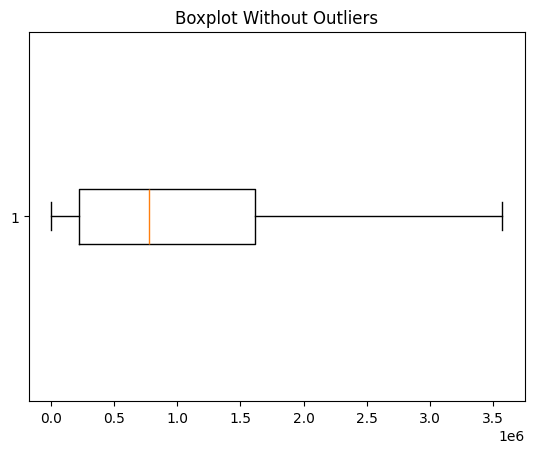

In [103]:
for col in df.drop(['status'], axis = 1).iloc[:, 0:6].columns:
    if df[col].dtype != 'object':
        print(f'-------------{col}--------------')
        print()
        replacing_outliers(df, col)
        plt.show()

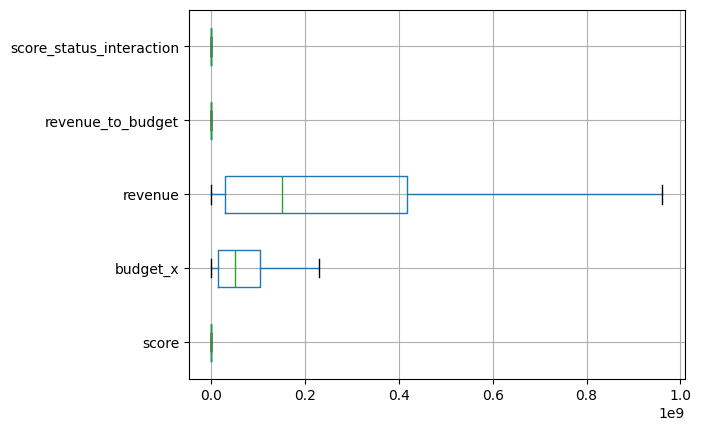

In [104]:
# Checking the overall outliers once again
df.drop('status', axis = 1).iloc[:, 0: 5].boxplot(vert = False)
plt.show()

### Model Building
- Stages of Model Building
- Custom train_test_Split function
- To perform Cross - Validation
- To do Hyperparameter Tuning

In [105]:
def train_and_test_split(data, tcol, testsize = 0.3, randomstate = 3):
    X = data.drop(tcol, axis = 1)
    y = data[tcol]
    tts = train_test_split(X, y, test_size = testsize, random_state = randomstate)
    return tts

In [106]:
def model_builder(model_name, model, data, tcol):
    # Splitting the data
    X_train, X_test, y_train, y_test = train_and_test_split(data, tcol)
    
    start_time = time.time()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # End time after model training
    end_time = time.time()

    # Predicting values for both training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate R² score for both train and test sets
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Calculate RMSE for both train and test sets
    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)

    # Calculate the time taken for the model to fit
    time_taken = end_time - start_time

    # Overfitting Check (Assign as String)
    overfit = 'Yes' if r2_train - r2_test > 0.03 else 'No'

    # Store the results
    result = [model_name, rmse_train, rmse_test , r2_train, r2_test, time_taken, overfit]

    return result

In [107]:
# Multiple Model
def multiple_model(data, tcol):
    col_names = ['Model_name', 'RMSE_Train' ,'RMSE_Test', 'R2_Train', 'R2_Test', 'Time_Taken', 'Overfitting']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('Linear Regression', LinearRegression(), data, tcol)
    result.loc[len(result)] = model_builder('Lasso', Lasso(), data, tcol)
    result.loc[len(result)] = model_builder('Ridge', Ridge(), data, tcol)
    result.loc[len(result)] = model_builder('ENet', ElasticNet(), data, tcol)
    result.loc[len(result)] = model_builder('DT', DecisionTreeRegressor(), data, tcol)
    result.loc[len(result)] = model_builder('SVR', SVR(), data, tcol)
    result.loc[len(result)] = model_builder('RF', RandomForestRegressor(), data, tcol)
    result.loc[len(result)] = model_builder('AdaBoost', AdaBoostRegressor(), data, tcol)
    result.loc[len(result)] = model_builder('GBoost', GradientBoostingRegressor(), data, tcol)
    result.loc[len(result)] = model_builder('XGBoost', XGBRegressor(), data, tcol)
    result.loc[len(result)] = model_builder('LightGBM', LGBMRegressor(), data, tcol)
    result.loc[len(result)] = model_builder('CatBoost', CatBoostRegressor(), data, tcol)


    return result.sort_values('R2_Test', ascending = False)

In [116]:
multiple_model(df, 'revenue')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1157
[LightGBM] [Info] Number of data points in the train set: 7060, number of used features: 49
[LightGBM] [Info] Start training from score 251668212.673592
Learning rate set to 0.055756
0:	learn: 251667110.1111293	total: 5.61ms	remaining: 5.6s
1:	learn: 239883817.1327594	total: 12.1ms	remaining: 6.06s
2:	learn: 228676625.4462192	total: 18.5ms	remaining: 6.14s
3:	learn: 218120212.4612538	total: 25.2ms	remaining: 6.27s
4:	learn: 207780389.9602874	total: 32.2ms	remaining: 6.41s
5:	learn: 198534588.8105708	total: 39ms	remaining: 6.46s
6:	learn: 190110276.9466139	total: 45.6ms	remaining: 6.47s
7:	learn: 182132819.7249897	total: 53.1ms	remaining: 6.59s
8:	learn: 174567523.5162369	total: 59.6ms	remaining: 6.56s
9:	learn: 167

,Model_name,RMSE_Train,RMSE_Test,R2_Train,R2_Test,Time_Taken,Overfitting
11,CatBoost,"6,814,041.19","12,548,774.82",1.00,1.00,6.53,No
10,LightGBM,"10,833,690.75","13,549,090.28",1.00,1.00,0.30,No
6,RF,"6,898,128.94","13,575,246.31",1.00,1.00,16.94,No
9,XGBoost,"4,536,203.55","14,458,758.20",1.00,1.00,0.36,No
4,DT,0.00,"21,950,989.48",1.00,0.99,0.25,No
8,GBoost,"23,444,275.68","22,737,634.32",0.99,0.99,4.17,No
7,AdaBoost,"94,286,746.83","94,804,898.28",0.87,0.86,2.16,No
2,Ridge,"132,925,662.64","130,235,397.59",0.74,0.74,0.00,No
1,Lasso,"132,924,669.42","130,260,790.24",0.74,0.74,1.01,No
0,Linear Regression,"132,924,669.42","130,260,791.96",0.74,0.74,0.04,No


### K-Fold Cross Validation

In [125]:
def k_fold_cv(X, y, fold=10):
    # Initialize models in a dictionary
    models = {
        'LightGBM': LGBMRegressor(),
        'CatBoost': CatBoostRegressor(verbose=0),  # Suppress output
        'DecisionTree' : DecisionTreeRegressor(),
        'RF': RandomForestRegressor(),
        'XGBoost': XGBRegressor(),
        'GradientBoosting': GradientBoostingRegressor(),
        'AdaBoost': AdaBoostRegressor(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'LinearRegression': LinearRegression(),
        'ElasticNet': ElasticNet()
    }

    results = []
    
    # Train-test split for overfitting check
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for model_name, model in models.items():
        # Cross-validation
        scores = cross_val_score(model, X, y, cv=fold)
        
        # Fit the model to check train-test accuracy
        model.fit(X_train, y_train)
        train_accuracy = model.score(X_train, y_train)
        test_accuracy = model.score(X_test, y_test)

        # Overfitting check
        overfitting = "Yes" if (train_accuracy - np.mean(scores)) > 0.05 else "No"

        # Append results
        results.append([model_name, np.mean(scores), np.std(scores), train_accuracy, test_accuracy, overfitting])

    # Create DataFrame for results
    k_fold_df = pd.DataFrame(results, columns=['Model Name', 'CV Accuracy', 'CV STD', 'Train Accuracy', 'Test Accuracy', 'Overfitting'])
    
    return k_fold_df.sort_values('CV Accuracy', ascending=False)

# Example usage:
# k_fold_df = k_fold_cv(X, y)
# print(k_fold_df)

In [126]:
k_fold_cv(df.drop('revenue', axis = 1), df['revenue'])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1164
[LightGBM] [Info] Number of data points in the train set: 9078, number of used features: 50
[LightGBM] [Info] Start training from score 234298676.793174
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1166
[LightGBM] [Info] Number of data points in the train set: 9078, number of used features: 50
[LightGBM] [Info] Start training from score 244741087.327750
[LightGBM] [Wa

,Model Name,CV Accuracy,CV STD,Train Accuracy,Test Accuracy,Overfitting
1,CatBoost,1.00,0.00,1.00,1.00,No
3,RF,1.00,0.00,1.00,1.00,No
0,LightGBM,1.00,0.00,1.00,1.00,No
4,XGBoost,1.00,0.00,1.00,1.00,No
2,DecisionTree,0.99,0.00,1.00,0.99,No
5,GradientBoosting,0.99,0.00,0.99,0.99,No
6,AdaBoost,0.84,0.03,0.85,0.85,No
7,Ridge,0.73,0.03,0.74,0.75,No
8,Lasso,0.73,0.03,0.74,0.75,No
9,LinearRegression,0.73,0.03,0.74,0.75,No


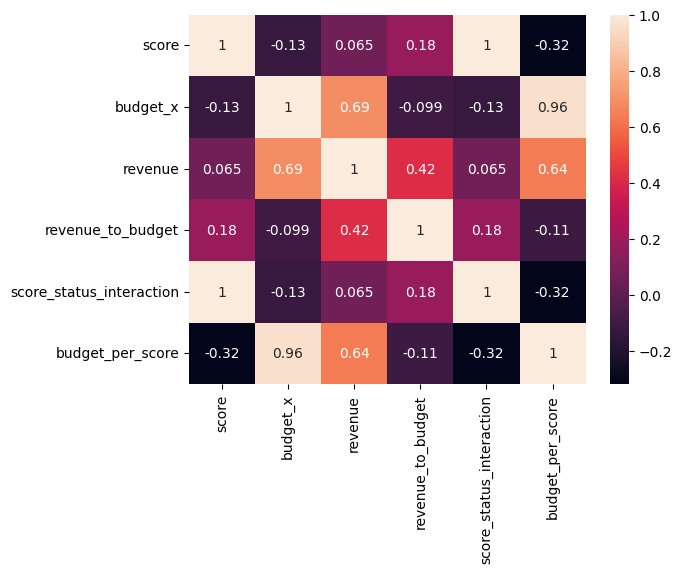

In [130]:
corr_matrix = pd.DataFrame(df).iloc[:, :6].corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()